# Can we predict daily precipitations given past data ? (times series)

# Chargement et analyse des données

In [1]:
# Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
import scipy.stats
plt.style.use('ggplot')

In [2]:
# Loading and Preprocessing precipitations data in Melbourne - Botanical Garden station
data = pd.read_csv('Data.csv')
data = data.drop([0])
print(data.shape[0]) # Number of days precpitations were registered 
data=data[data['Year']>=2000] # Limitation to 2000-2019 as 1995-2000 data seem unrealistic
print(data.shape[0]) # Number of days precpitations were registered between 2000 and 2019
data['Date'] = data["Year"].map(str) +"/"+ data["Month"].map(str) +"/"+ data["Day"].map(str)
data.rename(columns={'Rainfall amount (millimetres)':'Rainfall'}, inplace=True)
dataR = data[['Date','Rainfall']]
dataR['Date'] = pd.to_datetime(dataR['Date'])
dataR = dataR.set_index('Date')
dataR = dataR.fillna(value=0)

20088
6940


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [3]:
# Head of the dataframe
data.head()

,Product code,Bureau of Meteorology station number,Year,Month,Day,Rainfall,Period over which rainfall was measured (days),Quality,Date
13149,IDCJAC0009,86232,2000,1,1,0.0,NaN,Y,2000/1/1
13150,IDCJAC0009,86232,2000,1,2,0.2,1.0,Y,2000/1/2
13151,IDCJAC0009,86232,2000,1,3,0.0,NaN,Y,2000/1/3
13152,IDCJAC0009,86232,2000,1,4,6.4,1.0,Y,2000/1/4
13153,IDCJAC0009,86232,2000,1,5,2.4,1.0,Y,2000/1/5


In [4]:
# Head of the dataframe after removing NaN data
data.fillna(value=0).head()

,Product code,Bureau of Meteorology station number,Year,Month,Day,Rainfall,Period over which rainfall was measured (days),Quality,Date
13149,IDCJAC0009,86232,2000,1,1,0.0,0.0,Y,2000/1/1
13150,IDCJAC0009,86232,2000,1,2,0.2,1.0,Y,2000/1/2
13151,IDCJAC0009,86232,2000,1,3,0.0,0.0,Y,2000/1/3
13152,IDCJAC0009,86232,2000,1,4,6.4,1.0,Y,2000/1/4
13153,IDCJAC0009,86232,2000,1,5,2.4,1.0,Y,2000/1/5


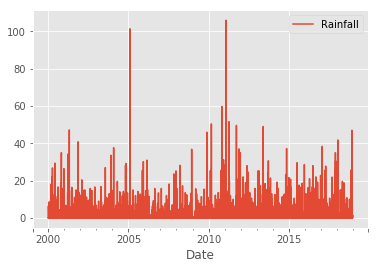

In [8]:
# Plot the evolution of the rainfall
dataR.reset_index().plot(x='Date', y=1)
plt.show()

In [9]:
# Head of the Rainfall dataframe
dataR.head()

,Rainfall
Date,
2000-01-01,0.0
2000-01-02,0.2
2000-01-03,0.0
2000-01-04,6.4
2000-01-05,2.4


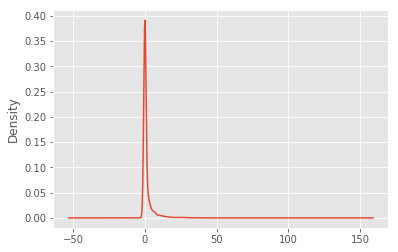

In [10]:
# Probability distribution of the rainfall
dataR['Rainfall'].plot.kde()
plt.show()

# Decomposition of the time serie and estimation of parameters

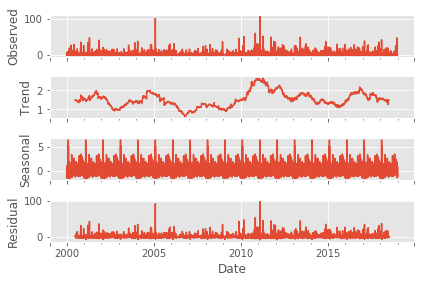

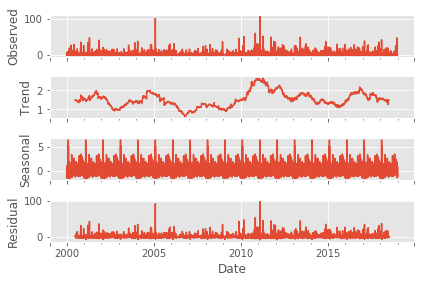

In [11]:
# Decompose Rainfall time serie, with a seasonality of 365 days
seasonal_decompose(dataR['Rainfall'],model='additive',freq=365).plot()

In [12]:
# Print residuals
res = seasonal_decompose(dataR['Rainfall'], model='additive')
residual = res.resid
seasonal = res.seasonal 
trend = res.trend
residual = residual.dropna()
print(residual)

Date
2000-01-04     5.325739
2000-01-05     1.224759
2000-01-06    -1.462210
2000-01-07    -1.238468
2000-01-08    -0.627266
2000-01-09    -0.146573
2000-01-10     0.295447
2000-01-11     0.240025
2000-01-12     0.110473
2000-01-13    -0.319353
2000-01-14    -0.295610
2000-01-15    -0.198694
2000-01-16     0.539141
2000-01-17     0.181161
2000-01-18     0.097167
2000-01-19    -0.003813
2000-01-20    -1.433638
2000-01-21    -1.467039
2000-01-22    -1.398694
2000-01-23     6.881998
2000-01-24    -1.990267
2000-01-25    -2.502833
2000-01-26    -1.003813
2000-01-27     5.909219
2000-01-28    -0.209896
2000-01-29    -1.684409
2000-01-30    -1.489430
2000-01-31     0.066876
2000-02-01     0.211453
2000-02-02     0.139044
                ...    
2018-11-29    -1.090781
2018-11-30    -2.038468
2018-12-01    -2.141551
2018-12-02    10.196284
2018-12-03    -1.418839
2018-12-04    -1.502833
2018-12-05    -1.603813
2018-12-06    -0.176495
2018-12-07    -0.152753
2018-12-08    -0.255837
2018-12-09 

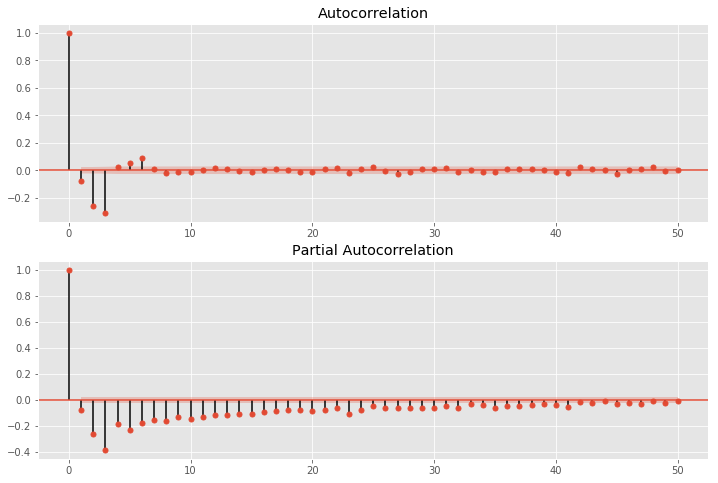

In [8]:
# Plot autocorrelation and partial autocorrelation of residuals
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(residual, ax=ax1,lags=50)
ax2 = fig.add_subplot(212)
fig = plot_pacf(residual, ax=ax2,method= 'ywmle',lags=50)

Autocorrelation seem to be non significative for ranks above or equal to 3 : we think about a MA(3) model.
Partial autocorrelation seem to be non significative for ranks above or equal to 3 : we think about a AR(42) model. 

In [4]:
# Stationarity verification
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_stationarity(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -30.439560
p-value                           0.000000
#Lags Used                       35.000000
Number of Observations Used    6898.000000
Critical Value (1%)              -3.431298
Critical Value (5%)              -2.861959
Critical Value (10%)             -2.566993
dtype: float64


Test statistic is below is below critical value at 1% : the serie seems to be stationarity without differenciation. 

39094.61025450025
39053.64101675975
38544.195819210654
37435.42861074125
37193.10979848557
36800.64410443413
36584.14570380457
36414.66813465269
36228.86608084748
36111.677777802324
35968.26241841828
35845.31937472362
35749.93724265301
35656.65431377653
35576.75167717393
39108.29863875274
39074.17359313848
38571.57258771564
37469.64957137247
37234.17495124304
36848.55344931785
36638.89924081453
36476.265863788896
36297.30800210993
36186.96389119102
36050.39272393322
35934.293872364804
35845.75593242044
35759.317195670206
35686.258751193855


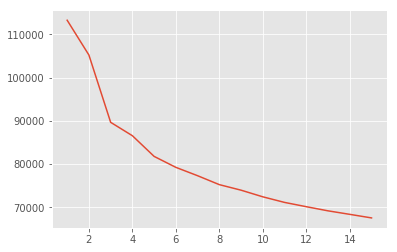

In [14]:
# Try an AR model - Test AIC BIC
for p in range(0,15):
    model = ARIMA(residual, (p, 0, 0),freq="D")
    res_000 = model.fit()
    print(res_000.aic)
    
for p in range(0,15):
    model = ARIMA(residual, (p, 0, 0),freq="D")
    res_000 = model.fit()
    print(res_000.bic)
    
p = np.linspace(1,15,15)
RSS = np.zeros(15)
for i in range(15):
    model = ARIMA(residual, order=(int(p[i]), 0, 0),freq="D")  
    results_AR = model.fit(disp=-1)  
    RSS[i] = sum((results_AR.fittedvalues-residual)**2)
plt.plot(p,RSS)
plt.show()

39094.61025450025
37323.5472108782
36032.95832956531
39108.29863875274
37344.07978725693
36060.33509807029


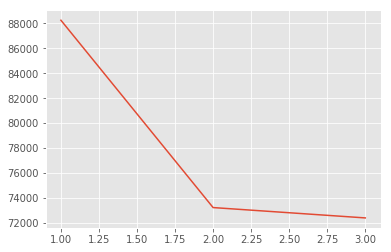

In [15]:
# Try a MA model - Test AIC BIC

for q in range(3):
    model = ARIMA(residual, (0, 0, q),freq="D")
    res_000 = model.fit()
    print(res_000.aic)

for q in range(3):
    model = ARIMA(residual, (0, 0, q),freq="D")
    res_000 = model.fit()
    print(res_000.bic)

p = np.linspace(1,3,3)
RSS = np.zeros(3)
for i in range(3):
    model = ARIMA(residual, order=(0, 0, int(p[i])),freq="D")  
    results_MA = model.fit(disp=-1)  
    RSS[i] = sum((results_MA.fittedvalues-residual)**2)
plt.plot(p,RSS)
plt.show()

The AR(12) model seems to be slightly better than the MA(3) model in terms of AIC and BIC. However, an AR(k) model for k>12 requires high computational time, while a MA(k) for k>3 is not computable because of inversibility issues (same for ARIMA models). 

# Verification of the model

In [26]:
# Test of absence of autocorrelation between residuals using Box Pierce statistic 
acorr_ljungbox(residual, boxpierce = True)

(array([  42.85025472,  507.62244243, 1167.74243929, 1172.15833666,
        1189.57366493, 1240.95764543, 1241.88907459, 1244.50644408,
        1245.81518232, 1246.77189192, 1246.96008634, 1248.29219751,
        1248.79312962, 1248.86618342, 1249.57590902, 1249.58604205,
        1249.98509859, 1250.11081057, 1251.05289724, 1252.1799338 ,
        1252.68815827, 1254.61558875, 1258.08539273, 1258.61257782,
        1262.82440428, 1262.88196693, 1267.10190785, 1268.56468047,
        1269.29777963, 1270.09399017, 1271.84930438, 1272.80598698,
        1272.90458647, 1273.83992409, 1275.10038555, 1275.6106298 ,
        1276.52309774, 1277.14090753, 1277.14093822, 1278.09043694]),
 array([5.90943895e-011, 5.90455512e-111, 7.31031671e-253, 1.72881255e-252,
        5.32551191e-255, 6.53574281e-265, 6.16621875e-264, 2.31582120e-263,
        1.55579368e-262, 1.17093155e-261, 1.22192131e-260, 6.87908917e-260,
        5.59328465e-259, 5.39415372e-258, 3.65344774e-257, 3.37634270e-256,
        2.4904

The second array corresponds to Ljung Box test p-values, while the last array correspond to the p-values of the box-pierce test. None of these p-values exceed 0.01, so the null hypothesis of absence of autocorrelation between residuals is not rejected with a confidence interval of 99%. 

In [16]:
# Tests of normality of residuals MA(3) 
modelma3 = ARIMA(residual, order=(0, 0, 3),freq="D")
resma3 = modelma3.fit()
residusma3 = resma3.resid
scipy.stats.kstest(residusma3/np.sqrt(np.var(residusma3)),'norm')

KstestResult(statistic=0.24090857791423526, pvalue=0.0)

In [32]:
# Tests of normality of residuals AR(12)
modelar12 = ARIMA(residual, order=(12, 0, 0),freq = "D")
resar12 = modelar12.fit()
residusar12 = resar12.resid
scipy.stats.kstest(residusar12/np.sqrt(np.var(residusar12)),'norm')

KstestResult(statistic=0.17988251678379663, pvalue=2.612693055098313e-195)

MA(3) : If the null hypothesis of normality of residuals is true, the probability to see the test statistic (0.24) as far as 0 is 0 : we have to reject this hypothesis.
AR(12) : If the null hypothesis of normality of residuals is true, the probability to see the test statistic (0.17) as far as 0 is $10^{-195}$, which is not much better.

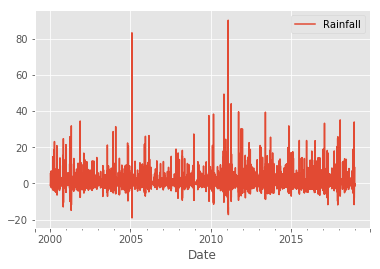

In [19]:
# Residual plot
residf = pd.DataFrame(residual)
residf.plot()
plt.show()

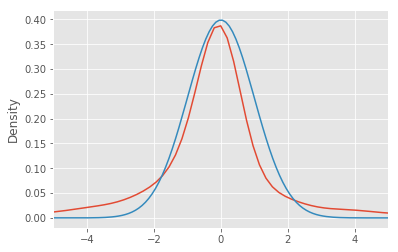

In [20]:
# Plot Probability Distribution of the residuals of MA(3) and compare to a normal distribution
resma3.resid.plot.kde()
x = np.linspace(-50, 50, 1000)
y = scipy.stats.norm.pdf(x)
plt.plot(x,y)
plt.xlim([-5,5])
plt.show()

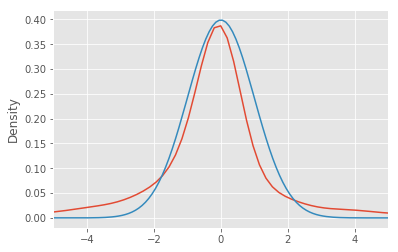

In [21]:
# Plot Probability Distribution of the residuals of AR(12) and compare to a normal distribution
resar12.resid.plot.kde()
x = np.linspace(-50, 50, 1000)
y = scipy.stats.norm.pdf(x)
plt.plot(x,y)
plt.xlim([-5,5])
plt.show()

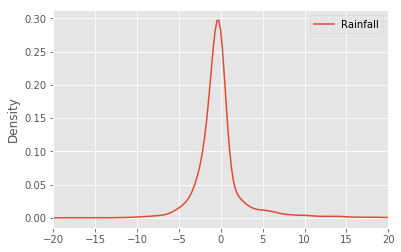

In [22]:
# Plot Probability Distribution of the residuals
residf.plot.kde()
plt.xlim(-20,20)
plt.show()

It seems there is an asymetry of the tails of distribution for MA(3) model.

In [52]:
residf.describe()

,Rainfall
count,6934.000000
mean,0.000324
std,4.054782
min,-19.112980
25%,-1.255837
50%,-0.324182
75%,0.194666
max,90.172734


In [23]:
# Test of significativity of coefficients MA(3)
modelma3 = ARIMA(residual, order=(0, 0, 3),freq="D")
model_fit_ma3 = modelma3.fit()
model_fit_ma3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               Rainfall   No. Observations:                 6934
Model:                     ARMA(0, 3)   Log Likelihood              -17973.000
Method:                       css-mle   S.D. of innovations              3.230
Date:                Wed, 20 Mar 2019   AIC                          35955.999
Time:                        23:37:22   BIC                          35990.220
Sample:                    01-04-2000   HQIC                         35967.797
                         - 12-28-2018                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            3.72e-07   3.28e-05      0.011      0.991   -6.39e-05    6.47e-05
ma.L1.Rainfall    -0.4634      0.015    -30.964      0.000      -0.493      -0.434
ma.L2.Rainfall    -0.3804      0.011    -35.355      0.000      -0.402      -0.359
ma.L3.Rainfall    -0.1562      0.016     -9.546      0.000      -0.188      -0.124
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2           -1.7182           -1.8579j            2.5306           -0.3688
MA.3           -1.7182           +1.8579j            2.5306            0.3688
-----------------------------------------------------------------------------
"""

In [25]:
# Test of significativity of coefficients AR(12)
modelar12 = ARIMA(residual, order=(12, 0, 0), freq="D")
model_fit_ar12 = modelar12.fit()
model_fit_ar12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               Rainfall   No. Observations:                 6934
Model:                    ARMA(12, 0)   Log Likelihood              -17860.969
Method:                       css-mle   S.D. of innovations              3.180
Date:                Wed, 20 Mar 2019   AIC                          35749.937
Time:                        23:37:42   BIC                          35845.756
Sample:                    01-04-2000   HQIC                         35782.971
                         - 12-28-2018                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            6.747e-05      0.005      0.013      0.990      -0.010       0.010
ar.L1.Rainfall     -0.4875      0.012    -40.874      0.000      -0.511      -0.464
ar.L2.Rainfall     -0.6989      0.013    -53.385      0.000      -0.725      -0.673
ar.L3.Rainfall     -0.8682      0.015    -57.224      0.000      -0.898      -0.838
ar.L4.Rainfall     -0.7195      0.018    -40.327      0.000      -0.754      -0.685
ar.L5.Rainfall     -0.7426      0.019    -39.239      0.000      -0.780      -0.705
ar.L6.Rainfall     -0.6463      0.020    -32.677      0.000      -0.685      -0.608
ar.L7.Rainfall     -0.5680      0.020    -28.726      0.000      -0.607      -0.529
ar.L8.Rainfall     -0.4917      0.019    -25.985      0.000      -0.529      -0.455
ar.L9.Rainfall     -0.3785      0.018    -21.211      0.000      -0.414      -0.344
ar.L10.Rainfall    -0.2843      0.015    -18.738      0.000      -0.314      -0.255
ar.L11.Rainfall    -0.1895      0.013    -14.472      0.000      -0.215      -0.164
ar.L12.Rainfall    -0.1182      0.012     -9.903      0.000      -0.142      -0.095
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.9207           -0.6208j            1.1105           -0.0944
AR.2             0.9207           +0.6208j            1.1105            0.0944
AR.3             0.6117           -0.9491j            1.1292           -0.1589
AR.4             0.6117           +0.9491j            1.1292            0.1589
AR.5             0.1968           -1.1638j            1.1803           -0.2233
AR.6             0.1968           +1.1638j            1.1803            0.2233
AR.7            -0.3789           -1.1745j            1.2341           -0.2997
AR.8            -0.3789           +1.1745j            1.2341            0.2997
AR.9            -1.1939           -0.2747j            1.2251           -0.4640
AR.10           -1.1939           +0.2747j            1.2251            0.4640
AR.11           -0.9582           -0.8783j            1.2999           -0.3819
AR.12           -0.9582           +0.8783j            1.2999            0.3819
------------------------------------------------------------------------------
"""

P>z low means coefficients are important, which is the case for all of them except the constant term. 

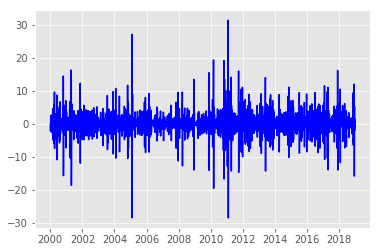

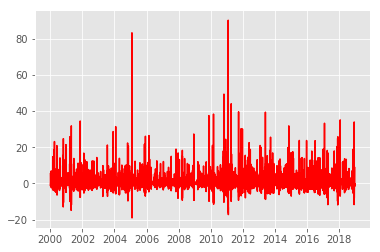

In [34]:
# Verification of the fit of the model AR(12)
values=resar12.fittedvalues
plt.plot(values, color="b")
plt.show()
plt.plot(residual,color="r")
plt.show()

# Predictions

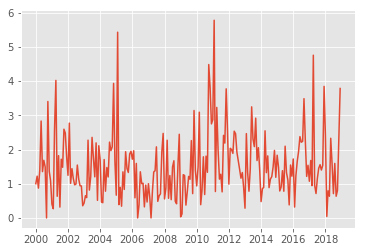

In [26]:
# To avoid doing too long computations, we average rainfall per month
R = dataR['Rainfall'].resample('MS').mean() # Averaging per month
train = R.loc['2000-01-01':'2014-01-01']
ltrain = len(train)
test = R.loc['2014-01-01':]
ltest = len(test)
plt.plot(R)
plt.show()

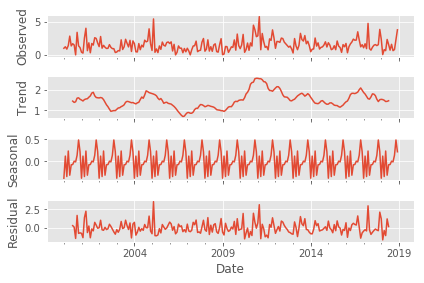

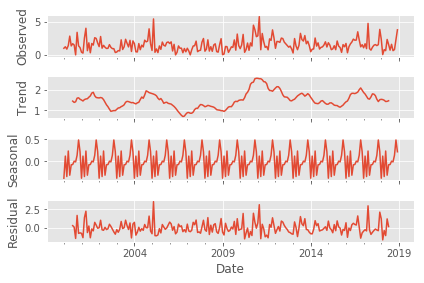

In [27]:
# Time series decomposition of the smoothed rainfall
resm = seasonal_decompose(R,model='additive')
resm.plot()

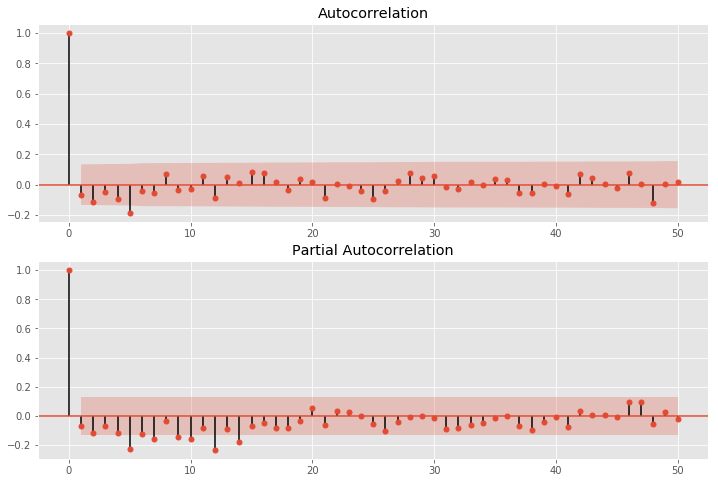

In [28]:
# Plot autocorrelation and partial autocorrelation of residuals
residualm = resm.resid
seasonalm = resm.seasonal 
trendm = resm.trend
residualm = residualm.dropna()
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(residualm, ax=ax1,lags=50)
ax2 = fig.add_subplot(212)
fig = plot_pacf(residualm, ax=ax2,method= 'ywmle',lags=50)

Monthly rainfall seem uncorrelated.

In [48]:
# SARIMA((0,0,0),(5,0,0,12)) model which keeps autoregressivity and the seasonality previously validated
train = R.loc['2000-01-01':'2014-01-01']
test = R.loc['2014-01-01':'2019-01-01']
for i in range(4,9):
    for j in range(1,13):
        modelSARIMA = sm.tsa.statespace.SARIMAX(train,order=(0,0,0),seasonal_order=(5,0,0,12),freq="MS")
        modelSARIMAfit = modelSARIMA.fit()
        if j < 12:
            pred = modelSARIMAfit.get_prediction(start=pd.to_datetime('201%a-%s-01' % (i,j)), end=pd.to_datetime('201%a-%s-01' % (i,j+1)))
        elif j == 12:
            pred = modelSARIMAfit.get_prediction(start=pd.to_datetime('201%a-%s-01' % (i,j)), end=pd.to_datetime('201%a-%s-01' % (i+1,1)))
        train = pd.concat([train,pred.predicted_mean.resample('MS').mean()]).resample('MS').mean()
predictions = train.loc['2014-01-01':'2019-01-01']

In [65]:
mean = np.zeros(12)
for i in range(4,9):
    for j in range(1,13):
        mean[i-1] = mean[i-1] + predictions.loc['201%a-0%s-01' %(i,j)]
mean # Mean rainfall per month 

array([ 0.        ,  0.        ,  0.        , 19.83475471, 19.8048818 ,
       21.29688388, 19.24902111, 19.16164958,  0.        ,  0.        ,
        0.        ,  0.        ])

April-August seems to be the most rainy period according to the forecast, which seems realistic as it corresponds to Fall / Winter in Melbourne.

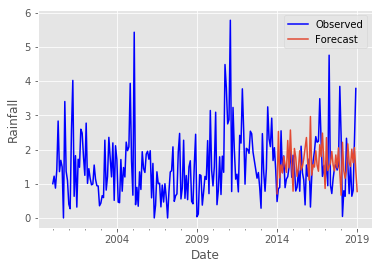

In [49]:
# Plot forecast and observed rainfall
ax = R.plot(label='Observed',color="b")
predictions.plot(label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Rainfall')
plt.legend()
plt.show()

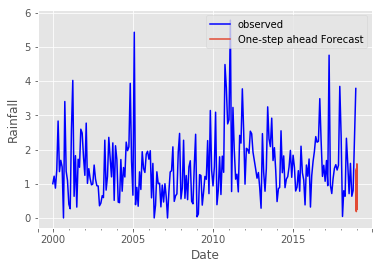

In [30]:
# Short term predictions
train = dataR.loc['2000-01-01':'2018-12-01']
test = dataR.loc['2018-12-01':'2019-01-01']
modelSARIMA = sm.tsa.statespace.SARIMAX(train,order=(0,0,0),seasonal_order=(12,0,0,12),freq="D")
modelSARIMAfit = modelSARIMA.fit()
pred = modelSARIMAfit.get_prediction(start=pd.to_datetime('2018-12-01'), end=pd.to_datetime('2019-01-01'),dynamic=False)
pred_ci = pred.conf_int()
ax = R.plot(label = 'observed',color="b")
pred.predicted_mean.plot(label = 'One-step ahead Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Rainfall')
plt.legend()
plt.show()

The model seems to reproduce well seasonality variations, but to struggle to reproduce brutal variations, which seems logical as monthly data with seasonality removed is actually uncorrelated. Overall, predictions with time series are too complex for a phenomenon with daily dependencies. 